# Homework 6

For this homework, you'll be looking at the survey data gathered from the last exam. For each cell, answer the question either with code or text, as specified.

The data is here: https://drive.google.com/file/d/1-0d9sGptmBTbzf4jRGYDE8pWwxz0d-0z/view?usp=sharing

Copy this notebook, fill it out, and then submit it.


# Question 1

Write code to load in the data in a dataframe.

In [27]:
import pandas as pd
import numpy as np
import scipy as sp
df = pd.read_csv("/content/MidtermSurvey_Processed.csv")

# Question 2

Create a column that measures, in minutes, how long each student took for their exam. Print the column at the end.

In [28]:
# Set the start time of the exam
start_time = pd.to_datetime('3:30:00 PM', format='%I:%M:%S %p')

# Calculate the duration in minutes by converting 'Time' column to datetime format
df['Time Taken'] = (pd.to_datetime(df['Time'], format='%I:%M:%S %p', errors='coerce') - start_time).dt.total_seconds() / 60
print(df)

     Unnamed: 0        Time  Hours_Studied Friend   Fair Lectures Assignments  \
0             0  4:45:00 PM            4.0     No    Yes      Yes         Yes   
1             1  4:45:14 PM            4.0    Yes  Kinda    Kinda       Kinda   
2             2  4:40:00 PM            4.0    Yes    Yes       No         Yes   
3             3  4:45:00 PM            7.0     No    Yes       No          No   
4             4  4:45:55 PM            2.0     No    Yes      Yes         Yes   
..          ...         ...            ...    ...    ...      ...         ...   
396         399         NaN            NaN    NaN    NaN      NaN         NaN   
397         400         NaN            NaN    NaN    NaN      NaN         NaN   
398         401         NaN            NaN    NaN    NaN      NaN         NaN   
399         402         NaN            NaN    NaN    NaN      NaN         NaN   
400         403         NaN            NaN    NaN    NaN      NaN         NaN   

     Sleep   XP Class      

# Question 3

Create a graph, comparing the distributions of the grades of students who thought the exam was fair, kind of fair, or not fair. (Note: If you create a graph that does not do a good job visuaizing this, you will loose points. For example, if you make a pie chart somehow, the graders will have no mercy).

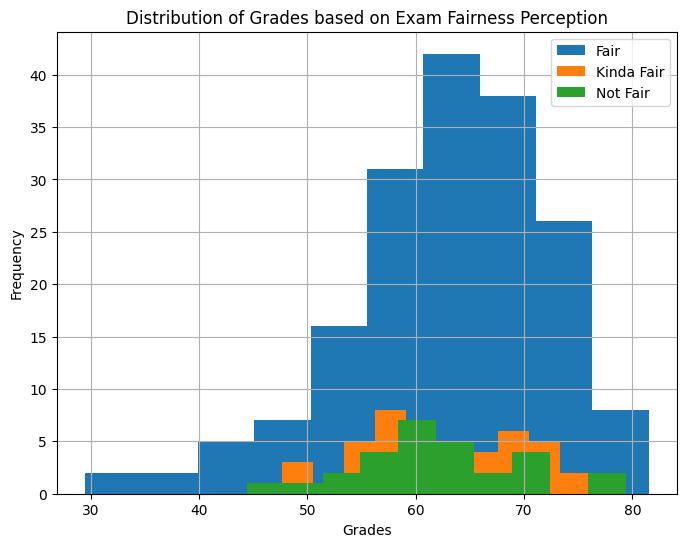

In [29]:
import matplotlib.pyplot as plt
fair_grades = df[df['Fair'] == 'Yes']['Grade']
kinda_fair_grades = df[df['Fair'] == 'Kinda']['Grade']
not_fair_grades = df[df['Fair'] == 'No']['Grade']

# Create a histogram comparing the distributions of grades
plt.figure(figsize=(8, 6))
plt.hist(fair_grades, label='Fair')
plt.hist(kinda_fair_grades, label='Kinda Fair')
plt.hist(not_fair_grades, label='Not Fair')

plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Distribution of Grades based on Exam Fairness Perception')
plt.legend()
plt.grid(True)
plt.show()

# Question 4

Do a hypothesis test to see if the distributions of students who thought the exam was fair, kinda fair, or unfair have a stastically significant difference in mean. Print your p-value.

In [30]:
# Since we are comparing more than two sets of categorical data, use one-way Anova test
from scipy.stats import f_oneway
# Null hypothesis: There is no difference between any of the groups who thought the exam was fair, kinda fair, or unfair.
# Alternate hypothesis: There is a difference between at least one of the groups who thought the exam was fair, kinda fair, or unfair.
f_statistic, p_value = f_oneway(fair_grades, kinda_fair_grades, not_fair_grades)
print(p_value)
# Since p-value is > 0.05, we fail to reject the null hypothesis.

0.8389966340907092


# Question 5

Does studying more improve your score? Find out, and summarize the results below in text format. If it does not, speculate as to why.

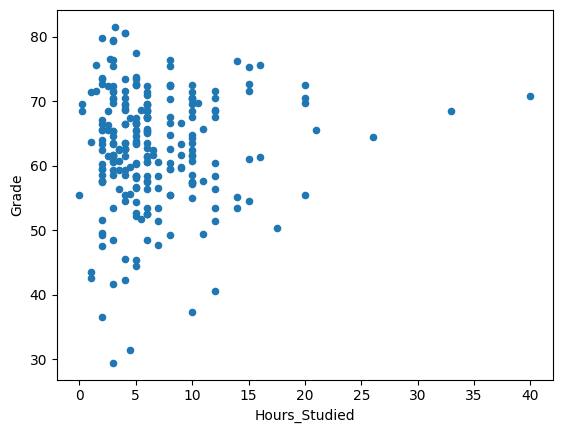

0.06286069182995391


In [31]:
df.plot(kind = 'scatter', x = 'Hours_Studied', y = 'Grade')
plt.show()
correlation = df['Grade'].corr(df['Hours_Studied'])
print(correlation)

The scatter plot shows that studying more does not necessarily improve your exam score. Many of the students studied between 0-20 hours and had highly variable exam scores, and the few who studied more than 20 hours did not have higher scores than many who studied for less. This is supported by the correlation coefficient between the two values being closer to 0 than 1, suggesting weak correlation.

# Question 6

Make another graph based on a question you think might be interesting.

Does the number of hours a student sleeps impact their exam performance?

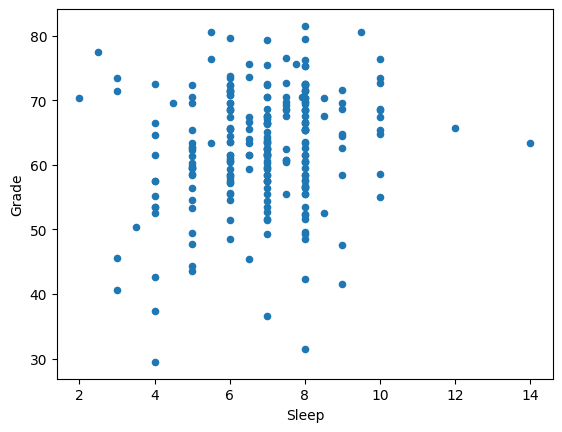

0.17649048543469256


In [32]:
df.plot(kind = 'scatter', x = 'Sleep', y = 'Grade')
plt.show()
correlation = df['Grade'].corr(df['Sleep'])
print(correlation)

The scatter plot shows that getting more rest does not necessarily improve your exam score. Many of the students slept between 4-8 hours and had highly variable exam scores, and the few who slept more than 8 hours or less than 4 hours did not have higher scores than many who slept a healthy amount. This is supported by the correlation coefficient between the two values being closer to 0 than 1, suggesting weak correlation.

# Question 7

Do a hypothesis test on something you think is interesting.

Are students who hastily finish their exams (finish their exams in less time) more likely to have lower grades?

In [33]:
from scipy.stats import ttest_ind
# Null hypothesis: There is no connection between exam finish time and exam grade.
# Alternate hypothesis: There exists a connection between exam finish time and exam grade.
t_statistic, pvalue = ttest_ind(df['Grade'].dropna(), df['Time Taken'].dropna())
if p_value <= 0.05:
  print("Reject null hypothesis.")
else:
  print("Fail to reject null hypothesis.")

Fail to reject null hypothesis.


# Question 8

Write code that trains a regression algorithm over the data, predicting grade. You may not use the "mystery" column, but you may use all other columns. You must get an R^2 value > .09.

(Note: This is going to be involved! You'll have to pick a regression algorithm and possibly do some preprocessing. Use what you learned in homework 5 to train it. You don't need a test set, since it's regression!)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Drop all rows with missing data
df.dropna(inplace=True)

# One-hot encoding for categorical columns
cat_cols = ['Time', 'Friend', 'Fair', 'Lectures', 'Assignments', 'XP', 'Class']
df_encoded = pd.get_dummies(df, columns = cat_cols)

# Split data into features and target variable. Also drop mystery column.
X = df_encoded.drop(['Grade', 'Mystery'], axis=1)
y = df_encoded['Grade']

# Train the model
reg = LinearRegression()
reg.fit(X, y)

# Predict on the test set
predict = reg.predict(X)

# Calculate R^2 as a metric for the model's performance
r2 = r2_score(y, predict)
print(r2)

0.5589459396104475


# Question 9

Is your model any good? What does its performance tell you about the input variables' relationship to your grade?

The model is ok considering the R^2 score is around 0.5, meaning that the line of best fit somewhat fits well with the data. This performance tells me that the input variables' relationship to a student's grade is possibly positively correlated.

# Question 10

Execute the same code with the addition of the mystery column. You must get an R^2 higher than .7. Print your R^2 value.

In [54]:
X['Mystery'] = df['Mystery']
# Train the model
reg = LinearRegression()
reg.fit(X, y)

# Predict on the test set
predict = reg.predict(X)

# Calculate R^2 as a metric for the model's performance
r2 = r2_score(y, predict)
print(r2)

0.9434727999572915


What is the mystery column, and why did it boost your model's accuracy so much?

The mystery column's data must have a strong correlation with the Grade variable to improve the accuracy of the model this much. Perhaps the data in the mystery column represents a student's assignment grades. Doing well on assignments could correlate to doing well on the exam.